## 关于图像阈值分割的一些基本操作以及一些滤波的函数。
### 图像阈值  
notice：在用plt.imshow和cv2.imshow显示同一幅图时可能会出现颜色差别很大的现象。这是因为：  
opencv的接口使用BGR，而matplotlib.pyplot 则是RGB模式

ret, dst = cv2.threshold(src, thresh, maxval, type)  
src：输入图，只能输入单通道图像，通常来说为灰度图  
dst：输出图   
threshold是设定的阈值  
maxval是当灰度值大于（或小于）阈值时将该灰度值赋成的值  
type规定的是当前二值化的方式  
以下5种类型： cv2.THRESH_BINARY； cv2.THRESH_BINARY_INV； cv2.THRESH_TRUNC； cv2.THRESH_TOZERO；cv2.THRESH_TOZERO_INV

- cv2.THRESH_BINARY           超过阈值部分取maxval（最大值），否则取0
- cv2.THRESH_BINARY_INV    THRESH_BINARY的反转
- cv2.THRESH_TRUNC            大于阈值部分设为阈值，否则不变
- cv2.THRESH_TOZERO          大于阈值部分不改变，否则设为0
- cv2.THRESH_TOZERO_INV  THRESH_TOZERO的反转  


In [1]:
import cv2
import matplotlib.pyplot as plt 
image = cv2.imread('dog_2.jpeg')
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image_gray.shape

(646, 700)

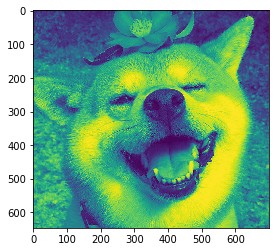

In [2]:
plt.imshow(image_gray)

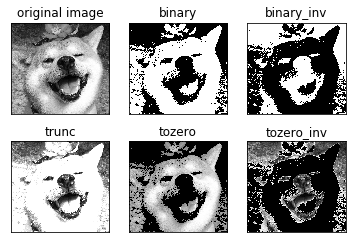

In [11]:
ret,thresh1 = cv2.threshold(image_gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(image_gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(image_gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(image_gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(image_gray,127,255,cv2.THRESH_TOZERO_INV)
titles = ['original image','binary','binary_inv','trunc','tozero','tozero_inv']
images = [image_gray,thresh1,thresh2,thresh3,thresh4,thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 图像平滑  
图像平滑是指用于突出图像的宽大区域、低频成分、主干部分或抑制图像噪声和干扰高频成分的图像处理方法,目的是使图像亮度平缓渐变,减小突变梯度,改善图像质量。

In [2]:
# 均值滤波 blur = cv2.blur(img, (3, 3))  
#需要传入两个参数，一个是需要滤波的图像，一个是卷积核的大小。
# 简单的平均卷积操作
blur = cv2.blur(image,(3,3))
cv2.imshow('blur',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 方框滤波  
基本和均值一样，可以选择归一化  
如果归一化normalize等于True，那么和均值滤波一样，如果normalize为False，那么大部分都将会发生越界的情况。

In [2]:

box = cv2.boxFilter(image,-1,(3,3),normalize=True)
cv2.imshow('box',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
box = cv2.boxFilter(image,-1,(3,3),normalize=False)
cv2.imshow('box',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

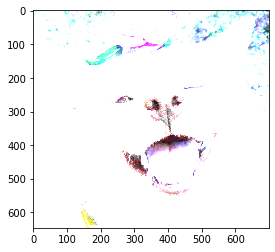

In [3]:
# plt.imshow(box)

### 高斯滤波  
高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的  

dst = cv2.GaussianBlur(src,ksize,sigmaX,sigmay,borderType)
        src: 输入图像矩阵,可为单通道或多通道，多通道时分别对每个通道进行卷积  
        dst:输出图像矩阵,大小和数据类型都与src相同  
        ksize:高斯卷积核的大小，宽，高都为奇数，且可以不相同  
        sigmaX: 一维水平方向高斯卷积核的标准差  
        sigmaY: 一维垂直方向高斯卷积核的标准差，默认值为0，表示与sigmaX相同  
        borderType:填充边界类型

In [3]:
gaussian = cv2.GaussianBlur(image,(5,5),1)
cv2.imshow('gaussian',gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()
# plt.imshow(gaussian)

### 中值滤波  
相当于用中值代替.中值平滑也有核，但并不进行卷积计算，而是对核中所有像素值排序得到中间值，用该中间值来代替锚点值。  
    cv2.medianBlur(src,ksize,dst)  
        -src: 输入图像对象矩阵,可以为单通道或多通道  
        -ksize:核的大小，格式为 3      #注意不是（3,3）  
        -dst:输出图像矩阵,大小和数据类型都与src相同

In [4]:
median = cv2.medianBlur(image,5)
cv2.imshow('median',median)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np 
# 展示所有的 
res = np.hstack((image,blur,aussian,median))
#print (res)
cv2.imshow('median vs average', res)
cv2.waitKey(0)
cv2.destroyAllWindows('median vs average')
cv2.waitKey(1)